In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
import warnings

warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

seed = 7
np.random.seed(seed)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

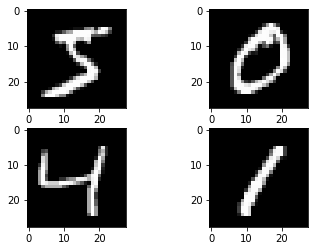

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_classes

10

In [9]:
def baseline_model():
    
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation = 'softmax'))
    
    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics=['accuracy'])
    
    return model

In [13]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 1s - loss: 0.2776 - acc: 0.9208 - val_loss: 0.1495 - val_acc: 0.9559 - 1s/epoch - 23us/sample
Epoch 2/10
60000/60000 - 1s - loss: 0.1101 - acc: 0.9682 - val_loss: 0.0918 - val_acc: 0.9722 - 1s/epoch - 21us/sample
Epoch 3/10
60000/60000 - 1s - loss: 0.0698 - acc: 0.9800 - val_loss: 0.0754 - val_acc: 0.9776 - 1s/epoch - 20us/sample
Epoch 4/10
60000/60000 - 1s - loss: 0.0495 - acc: 0.9860 - val_loss: 0.0744 - val_acc: 0.9770 - 1s/epoch - 20us/sample
Epoch 5/10
60000/60000 - 1s - loss: 0.0353 - acc: 0.9898 - val_loss: 0.0652 - val_acc: 0.9793 - 1s/epoch - 21us/sample
Epoch 6/10
60000/60000 - 1s - loss: 0.0252 - acc: 0.9932 - val_loss: 0.0587 - val_acc: 0.9813 - 1s/epoch - 20us/sample
Epoch 7/10
60000/60000 - 1s - loss: 0.0186 - acc: 0.9958 - val_loss: 0.0621 - val_acc: 0.9796 - 1s/epoch - 21us/sample
Epoch 8/10
60000/60000 - 1s - loss: 0.0145 - acc: 0.9968 - val_loss: 0.0597 - val_acc: 0.9823 - 1s/epoch - 20us/sampl